Pleural Effusion Classifier

In [3]:
# import dependencies
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from PIL import Image
import imutils
from gradcam.code import GradCAM
import os, random
import os.path

In [1]:
# load model
from tensorflow.keras.models import load_model
model = load_model(r'checkpoint/vgg19gap_checkpoint.h5')
model.summary()

Model: &quot;model&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)   

In [4]:
# prepare test data
image_rows, image_cols = 224, 224
batch_size = 16

# generator for test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory('dataset/test_set'
                                                               ,target_size=(image_rows,image_cols)
                                                               ,batch_size=batch_size
                                                               ,class_mode='categorical'
                                                               ,shuffle=False
                                                               )

Found 250 images belonging to 2 classes.


In [10]:
# predict data, y = real value, y_pred = predicted value
y_pred = model.predict_generator(validation_generator, len(validation_generator))

# y_pred indices
y_pred_label_indices=y_pred[:250, :1]
y_pred_label_indices=y_pred_label_indices.reshape(250,)
#np.set_printoptions(precision=2, suppress=True)
y_pred_label_indices = np.flipud(y_pred_label_indices)
# y_pred_label_indices
y_pred_label_indices = np.argmax(y_pred, axis=1)
print(y_pred_label_indices)
print(validation_generator.classes)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Confusion Matrix & Classification Report

In [11]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred_label_indices)
print(cnf_matrix)

[[114  11]
 [  2 123]]


In [12]:
# create label for data (per each class), for calssification report
class_labels = validation_generator.class_indices
class_name = list(class_labels.keys())

# classification report
print(classification_report(validation_generator.classes, y_pred_label_indices, target_names = class_name))

              precision    recall  f1-score   support

    Effusion       0.98      0.91      0.95       125
  No Finding       0.92      0.98      0.95       125

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



Plot Confusion Matrix with Seaborn

Text(0.5, 17.5, &#39;Predicted label&#39;)

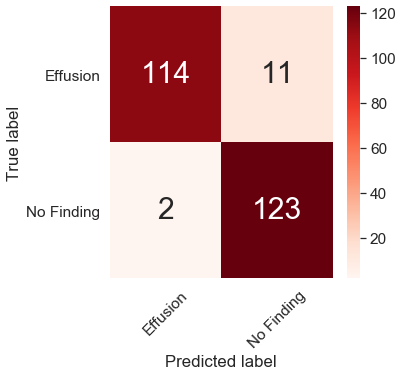

In [13]:
import seaborn as sns
plt.figure(figsize=(5,5))

x_axis_labels = ['Effusion', 'No Finding']
y_axis_labels = ['Effusion', 'No Finding']

sns.set(font_scale=1.4) #for label size
sns.heatmap(cnf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, annot_kws={"size": 30} , cmap="Reds", fmt='g')

plt.yticks(rotation=360)
plt.xticks(rotation=45)

plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig(r'graphs\cnf.png', dpi = 100)

No Skill: ROC AUC=0.500
Model: ROC AUC=0.990


&lt;matplotlib.legend.Legend at 0x297f330a788&gt;

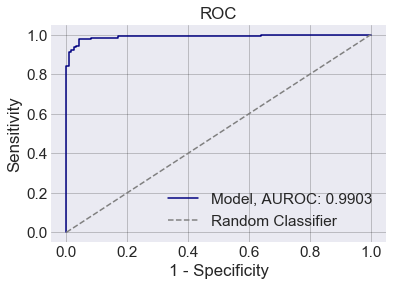

In [14]:
# roc, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc  = roc_auc_score(validation_generator.classes, y_pred_label_indices)
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.title('ROC')

lr_probs = y_pred[:, 1]
testy = validation_generator.classes
ns_probs = [0 for _ in range(len(testy))]

ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

plt.plot(lr_fpr, lr_tpr, label= 'Model, AUROC: %.4f' % lr_auc, color = 'navy')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classifier', color = 'gray')
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
plt.legend()
#plt.savefig(r'graphs\roc.png', dpi = 100)

Make Single Prediction (OpenCV - Grad-CAM)

In [20]:
for i in range(3):
    
    # select random image from directory
    No_Finding = random.choice(os.listdir(r"dataset\test_set\No Finding"))
    Effusion = random.choice(os.listdir(r"dataset\test_set\Effusion"))
    image_path = random.choice([Effusion, No_Finding])

    # path of image file
    for root, dirs, files in os.walk(r'C:\Users\ahmad\Documents\Python Scripts\project_5\test_2'):
        for name in files:
            if name == image_path:
                image_path = os.path.abspath(os.path.join(root, name))
    
    # store image res
    im = Image.open(image_path)
    width, height = im.size
    
    # load image data
    loadimage = image_path

    # true label of the image
    true_label = os.path.split(os.path.dirname(loadimage))[-1]
    
    # function, make and sort prediction
    def testimage():
        global loadimage
        test_image = image.load_img(loadimage, target_size = (224, 224))
        test_image = image.img_to_array(test_image).astype('float32')*1/255
        test_image_expand = np.expand_dims(test_image,axis=0)
        test_image = model.predict(test_image_expand)
        
        test_image_probs = {test_image[0, 0] * 100 : "Effusion" ,
                            test_image[0, 1] * 100 : "No Finding"}
        
        test_image_probs = {v: k for k, v in sorted(test_image_probs.items(), reverse=True)}
        
        if test_image[0, 0] > test_image[0, 1]:
            test_image_label = 'Effusion'
        else:
            test_image_label = 'No Finding'
        
        return test_image, test_image_probs, test_image_expand, test_image_label
    
    test_image_return = testimage()
    
    test_image_extract = test_image_return[1]
    
    # extract every single key and value on testimage_prob_sorted dictionary to its own variable
    testimage_prob_sorted_keys = list(test_image_extract.keys())
    testimage_prob_sorted_values = list(test_image_extract.values())

    prob_key_1 = testimage_prob_sorted_keys[0]
    prob_value_1 = round(testimage_prob_sorted_values[0], 2)

    prob_key_2 = testimage_prob_sorted_keys[1]
    prob_value_2 = round(testimage_prob_sorted_values[1], 2)
    
    # grad-cam
    test_image_gradcam = test_image_return[0]
    
    i = np.argmax(test_image_gradcam[0])
    
    test_image_expand = test_image_return[2]
    
    cam = GradCAM(model, i)
    
    def gradcam():
        global i
        global test_image_expand
        global cam
        heatmap = cam.compute_heatmap(test_image_expand)
        return heatmap

    gradcam = gradcam()
    
    orig = cv2.imread(loadimage)
    heatmap = cv2.resize(gradcam, (width, height))
    (heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.6)
        
    background = orig
    overlay = heatmap
    heatbox = cv2.addWeighted(background, 0.9, overlay, 0.4, 0)
    
    heatbox = cv2.resize(heatbox, (1024, 1024))
    heatmap = cv2.resize(heatmap, (1024, 1024))
    orig = cv2.resize(orig, (1024, 1024))
    
    output = np.hstack([orig, heatbox])
    output = imutils.resize(output, height=500)
    
    # OpenCV
    
    test_image_label = test_image_return[3]
    
    # Some Text
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    fontScale              = 1
    lineType               = 2

    def fontColor():
        if true_label == test_image_label:
            fontColor  = (0, 255, 0)
        else:
            fontColor  = (0, 0, 255)
        return fontColor

    fontColor = fontColor()

    if true_label == 'No Finding':
        true_label = 'No Finding (IGNORE HEATMAP)'
    else:
        true_label = true_label
    
    true_label_text_pos = (10,30)
    predicted_label_text_pos = (10,60)
    predicted_proba_text_pos_1 = (10,90)
    predicted_proba_text_pos_2 = (10,120)
    # get file name
    file_name = os.path.basename(image_path)
    file_name_pos = (10,150)


    cv2.putText(output,'True Label : ' + true_label, 
        true_label_text_pos, 
        font, 
        fontScale,
        fontColor,
        lineType)

    cv2.putText(output,'Predicted Label : ', 
        predicted_label_text_pos, 
        font, 
        fontScale,
        fontColor,
        lineType)

    cv2.putText(output,prob_key_1 + " - " + str(prob_value_1) + '%', 
        predicted_proba_text_pos_1, 
        font, 
        fontScale,
        fontColor,
        lineType)

    cv2.putText(output,prob_key_2 + " - " + str(prob_value_2) + '%', 
        predicted_proba_text_pos_2, 
        font, 
        fontScale,
        fontColor,
        lineType)
    
    
    cv2.putText(output,'File Name : ' + file_name, 
        file_name_pos,       
        font, 
        fontScale,
        fontColor,
        lineType)
    
    cv2.imshow("Output", output)
    #cv2.imwrite(r"graphs\test_{}.png".format(i+1), output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Detection with Bounding Box (Imperfect)

In [50]:
for i in range(3):
    
    # select random image from directory
    No_Finding = random.choice(os.listdir(r"dataset\test_set\No Finding"))
    Effusion = random.choice(os.listdir(r"dataset\test_set\Effusion"))
    image_path = random.choice([No_Finding, Effusion])

    # path of image file
    for root, dirs, files in os.walk(r'D:\Data\Documents\Rafi\Python Scripts\Pleural_Effusion_Classifier_Model_Keras_TF'):
        for name in files:
            if name == image_path:
                image_path = os.path.abspath(os.path.join(root, name))
    
    # store image res
    im = Image.open(image_path)
    width, height = im.size
    
    # load image data
    loadimage = image_path

    # true label of the image
    true_label = os.path.split(os.path.dirname(loadimage))[-1]
    
    # function, make and sort prediction
    def testimage():
        global loadimage
        test_image = image.load_img(loadimage, target_size = (224, 224))
        test_image = image.img_to_array(test_image).astype('float32')*1/255
        test_image_expand = np.expand_dims(test_image,axis=0)
        test_image = model.predict(test_image_expand)
        
        test_image_probs = {test_image[0, 0] * 100 : "Effusion" ,
                            test_image[0, 1] * 100 : "No Finding"}
        
        test_image_probs = {v: k for k, v in sorted(test_image_probs.items(), reverse=True)}
        
        if test_image[0, 0] > test_image[0, 1]:
            test_image_label = 'Effusion'
        else:
            test_image_label = 'No Finding'
        
        return test_image, test_image_probs, test_image_expand, test_image_label
    
    test_image_return = testimage()
    
    test_image_extract = test_image_return[1]
    
    # extract every single key and value on testimage_prob_sorted dictionary to its own variable
    testimage_prob_sorted_keys = list(test_image_extract.keys())
    testimage_prob_sorted_values = list(test_image_extract.values())

    prob_key_1 = testimage_prob_sorted_keys[0]
    prob_value_1 = round(testimage_prob_sorted_values[0], 2)

    prob_key_2 = testimage_prob_sorted_keys[1]
    prob_value_2 = round(testimage_prob_sorted_values[1], 2)
    
    # grad-cam
    test_image_gradcam = test_image_return[0]
    
    i = np.argmax(test_image_gradcam[0])
    
    test_image_expand = test_image_return[2]
    
    cam = GradCAM(model, i)
    
    def gradcam():
        global i
        global test_image_expand
        global cam
        heatmap = cam.compute_heatmap(test_image_expand)
        return heatmap

    gradcam = gradcam()

    orig = cv2.imread(loadimage)
    heatmap = cv2.resize(gradcam, (width, height))
    (heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.6)
        
    background = orig
    overlay = heatmap
    heatbox = cv2.addWeighted(background, 0.7, overlay, 0.6, 0)
    
    heatbox = cv2.resize(heatbox, (1024, 1024))
    heatmap = cv2.resize(heatmap, (1024, 1024))
    orig = cv2.resize(orig, (1024, 1024))
    
    output = np.hstack([orig, heatmap, heatbox])
    output = imutils.resize(output, height=500)
    
    # bounding box
    gray = cv2.cvtColor(heatmap, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)[1]
    
    try:
        contours = [contours[1], contours[2], contours[3]]
        for c in contours[0]:
            x,y,w,h = cv2.boundingRect(contours[0])
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0,255,0), 1)
        for c in contours[1]:
            x,y,w,h = cv2.boundingRect(contours[1])
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0,255,0), 1)
        for c in contours[2]:
            x,y,w,h = cv2.boundingRect(contours[1])
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0,255,0), 1)
    except:
        pass
    
    try:
        contours = [contours[1], contours[2]]
        for c in contours[0]:
            x,y,w,h = cv2.boundingRect(contours[0])
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0,255,0), 2)
        for c in contours[1]:
            x,y,w,h = cv2.boundingRect(contours[1])
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0,255,0), 2)    
    except:
        pass
    
    try:
        contours = contours[1]
        for c in contours:
            x,y,w,h = cv2.boundingRect(contours)
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0,255,0), 2)
    except:
        pass

    contours = contours[0]
    for c in contours:
        x,y,w,h = cv2.boundingRect(contours)
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0,255,0), 2)
        
    background = orig
    overlay = heatmap
    heatbox = cv2.addWeighted(background, 0.6, overlay, 0.6, 0)
    output = np.hstack([orig, heatbox])
    output = imutils.resize(output, height=500)
    
    # OpenCV
    
    test_image_label = test_image_return[3]
    
    # Some Text
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    fontScale              = 1
    lineType               = 2

    def fontColor():
        if true_label == test_image_label:
            fontColor  = (0, 255, 0)
        else:
            fontColor  = (0, 0, 255)
        return fontColor

    fontColor = fontColor()

    if true_label == 'No Finding':
        true_label = 'No Finding (IGNORE HEATMAP & BOUNDING BOX)'
    else:
        true_label = true_label
    
    true_label_text_pos = (10,30)
    predicted_label_text_pos = (10,60)
    predicted_proba_text_pos_1 = (10,90)
    predicted_proba_text_pos_2 = (10,120)
    # get file name
    file_name = os.path.basename(image_path)
    file_name_pos = (10,150)


    cv2.putText(output,'True Label : ' + true_label, 
        true_label_text_pos, 
        font, 
        fontScale,
        fontColor,
        lineType)

    cv2.putText(output,'Predicted Label : ', 
        predicted_label_text_pos, 
        font, 
        fontScale,
        fontColor,
        lineType)

    cv2.putText(output,prob_key_1 + " - " + str(prob_value_1) + '%', 
        predicted_proba_text_pos_1, 
        font, 
        fontScale,
        fontColor,
        lineType)

    cv2.putText(output,prob_key_2 + " - " + str(prob_value_2) + '%', 
        predicted_proba_text_pos_2, 
        font, 
        fontScale,
        fontColor,
        lineType)
    
    cv2.putText(output,'File Name : ' + file_name, 
        file_name_pos,       
        font, 
        fontScale,
        fontColor,
        lineType)
    
    cv2.imshow("Output", output)
    #cv2.imwrite(r"graphs\test_bbox_{}.png".format(i+1), output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()